# a)

In [3]:
import pandas as pd

df = pd.read_csv("data/norway_new_car_sales_by_month.csv")
df.head()

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
0,2007,1,12685,5227,2276,257,NaN,NaN,152,155,152,10072,79.4,52.5,NaN,NaN,NaN
1,2007,2,9793,2448,1992,-89,NaN,NaN,156,159,155,7222,73.7,47.4,NaN,NaN,NaN
2,2007,3,11264,1445,2626,45,NaN,NaN,159,161,158,7965,70.7,48.1,NaN,NaN,NaN
3,2007,4,8854,504,2220,-130,NaN,NaN,160,165,158,6116,69.1,48.4,NaN,NaN,NaN
4,2007,5,12007,1592,2881,7,NaN,NaN,160,163,159,8519,71.0,49.1,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               121 non-null    int64  
 1   Month              121 non-null    int64  
 2   Quantity           121 non-null    int64  
 3   Quantity_YoY       121 non-null    int64  
 4   Import             121 non-null    int64  
 5   Import_YoY         121 non-null    int64  
 6   Used               61 non-null     float64
 7   Used_YoY           49 non-null     float64
 8   Avg_CO2            121 non-null    int64  
 9   Bensin_Co2         121 non-null    int64  
 10  Diesel_Co2         121 non-null    int64  
 11  Quantity_Diesel    121 non-null    int64  
 12  Diesel_Share       121 non-null    float64
 13  Diesel_Share_LY    121 non-null    float64
 14  Quantity_Hybrid    73 non-null     float64
 15  Quantity_Electric  73 non-null     float64
 16  Import_Electric    53 non-

In [5]:
df.shape

(121, 17)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,121.0,2011.545455,2.915476,2007.0,2009.0,2012.0,2014.0,2017.0
Month,121.0,6.454545,3.488075,1.0,3.0,6.0,9.0,12.0
Quantity,121.0,11134.297521,1752.046397,5353.0,10250.0,11385.0,12337.0,14207.0
Quantity_YoY,121.0,392.586777,1789.539953,-4548.0,-526.0,493.0,1445.0,5227.0
Import,121.0,2204.371901,573.127896,1048.0,1812.0,2263.0,2625.0,3768.0
Import_YoY,121.0,-135.049587,545.395787,-1810.0,-495.0,-114.0,162.0,1334.0
Used,61.0,36864.737705,4230.548664,24106.0,34212.0,37079.0,39797.0,44106.0
Used_YoY,49.0,973.122449,2728.915662,-6261.0,-392.0,855.0,2708.0,5896.0
Avg_CO2,121.0,129.520661,22.719338,84.0,110.0,132.0,151.0,162.0
Bensin_Co2,121.0,133.735537,17.094233,94.0,120.0,131.0,150.0,165.0


In [7]:
df.columns

Index(['Year', 'Month', 'Quantity', 'Quantity_YoY', 'Import', 'Import_YoY',
       'Used', 'Used_YoY', 'Avg_CO2', 'Bensin_Co2', 'Diesel_Co2',
       'Quantity_Diesel', 'Diesel_Share', 'Diesel_Share_LY', 'Quantity_Hybrid',
       'Quantity_Electric', 'Import_Electric'],
      dtype='object')

# b)

In [8]:
import duckdb

df_yearly_quantity = duckdb.query("""
    SELECT
        year,
        SUM(quantity) AS quantity
    FROM df
    GROUP BY year
    ORDER BY year             
""").df().set_index("Year")

df_yearly_quantity

,quantity
Year,
2007,129195.0
2008,110617.0
2009,98675.0
2010,127754.0
2011,138345.0
2012,137967.0
2013,142151.0
2014,144202.0
2015,150686.0


<Axes: xlabel='Year'>

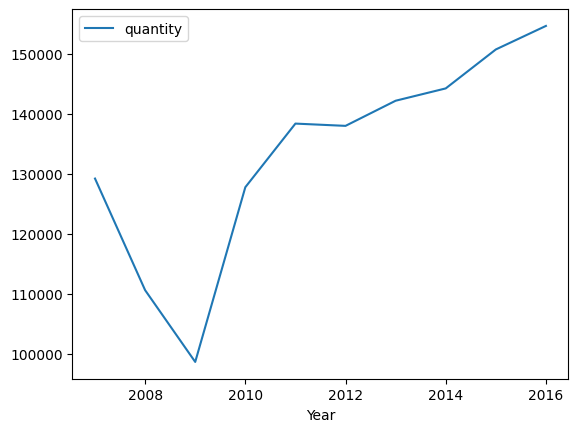

In [9]:
df_yearly_quantity.iloc[:-1].plot()
# skip 2017 since there is only data from 1 month

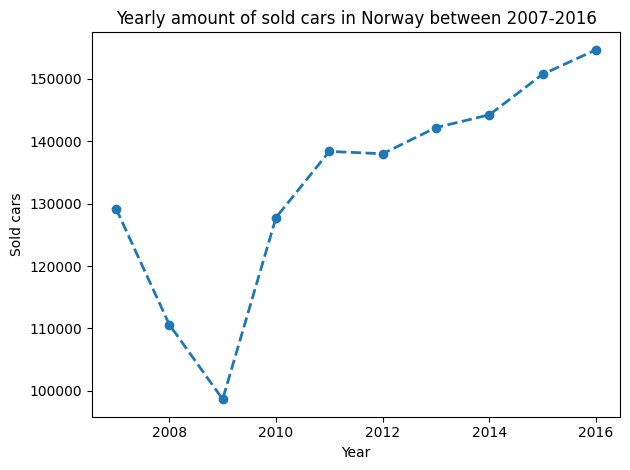

In [10]:
ax = df_yearly_quantity.iloc[:-1].plot(
    title="Yearly amount of sold cars in Norway between 2007-2016",
    xlabel="Year",
    ylabel="Sold cars",
    style="o--",
    linewidth=2
)

ax.legend().remove()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/yearly_car_sale.png")

# c)

In [11]:
df_yearly_CO2 = duckdb.query("""
    SELECT
        year,
        SUM(Avg_CO2) AS CO2_Emission
    FROM df
    GROUP BY year
    ORDER BY year             
""").df().set_index("Year")

df_yearly_CO2

,CO2_Emission
Year,
2007,1908.0
2008,1896.0
2009,1811.0
2010,1688.0
2011,1608.0
2012,1559.0
2013,1476.0
2014,1325.0
2015,1197.0


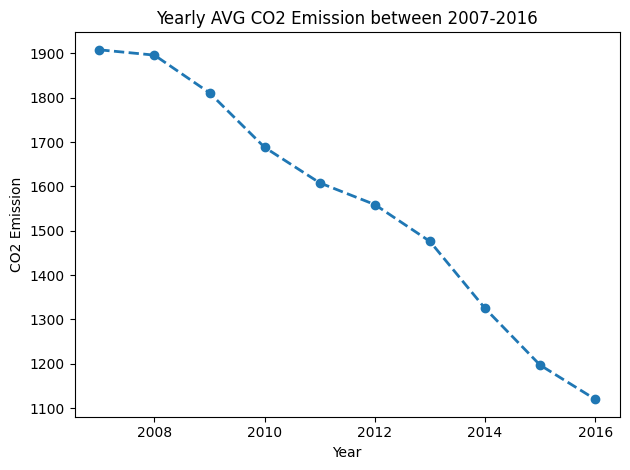

In [12]:
ax1 = df_yearly_CO2.iloc[:-1].plot(
        title="Yearly AVG CO2 Emission between 2007-2016",
        xlabel="Year",
        ylabel="CO2 Emission",
        style="--o",
        linewidth=2
    )

ax1.legend().remove()
fig = ax1.get_figure()
fig.tight_layout()
fig.savefig("figures/CO2_Emission.png")

## d)

In [13]:
df_imports = duckdb.query("""
    SELECT
        year || '-' || LPAD(CAST(month AS VARCHAR), 2, '0') AS date,
        SUM(import) AS import
    FROM df
    GROUP BY year, month, import
    ORDER BY year, month
""").df()

df_imports["date"] = pd.to_datetime(df_imports["date"], format="%Y-%m")
df_imports.head()

,date,import
0,2007-01-01,2276.0
1,2007-02-01,1992.0
2,2007-03-01,2626.0
3,2007-04-01,2220.0
4,2007-05-01,2881.0


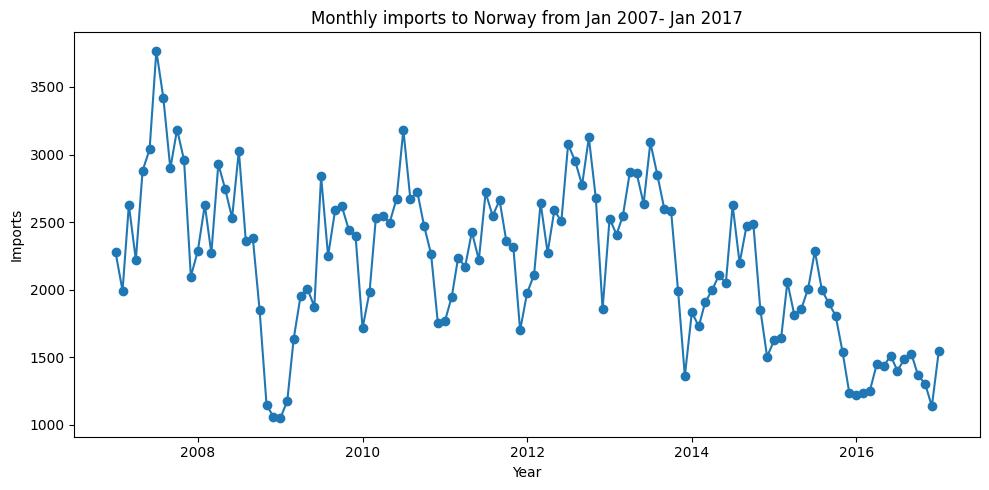

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_imports["date"], df_imports["import"], marker='o')
plt.title("Monthly imports to Norway from Jan 2007- Jan 2017")
plt.xlabel("Year")
plt.ylabel("Imports")
plt.tight_layout()
plt.savefig("figures/monthly_imports.png")

## e)

In [19]:
df_all_CO2 = duckdb.query("""
    SELECT
        year || '-' || LPAD(CAST(month AS VARCHAR), 2, '0') AS date,
        SUM(Avg_CO2) AS CO2_Emission
    FROM df
    GROUP BY year, month
    ORDER BY year, month
""").df()

df_all_CO2["date"] = pd.to_datetime(df_all_CO2["date"], format="%Y-%m")
df_all_CO2.head()

,date,CO2_Emission
0,2007-01-01,152.0
1,2007-02-01,156.0
2,2007-03-01,159.0
3,2007-04-01,160.0
4,2007-05-01,160.0


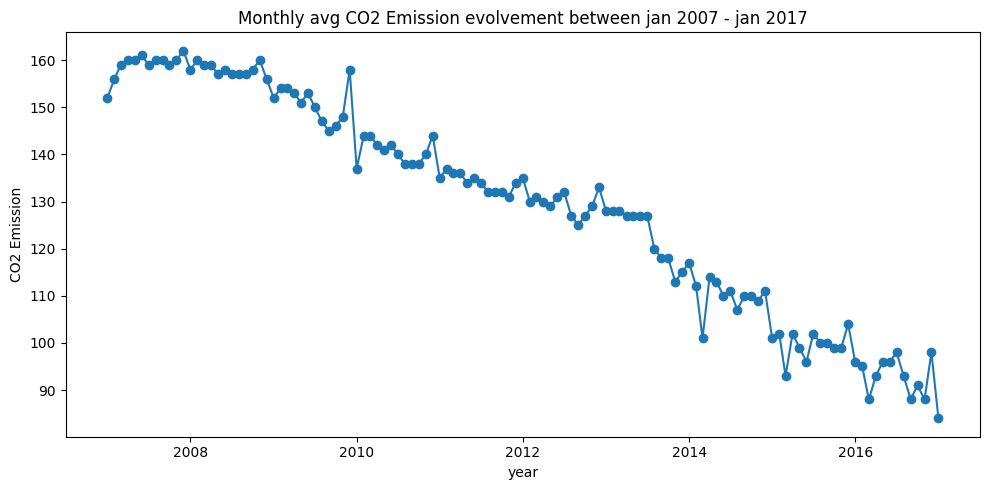

In [28]:
plt.figure(figsize=(10,5))
plt.plot(df_all_CO2['date'], df_all_CO2['CO2_Emission'], marker='o')
plt.title('Monthly avg CO2 Emission evolvement between jan 2007 - jan 2017')
plt.xlabel('year')
plt.ylabel('CO2 Emission')
plt.tight_layout()
plt.savefig("figures/monthly_CO2_Emission.png")